In [1]:
using PyPlot, HDF5

In [2]:
path = "/Users/inchani/.julia/download/"
x1d_obs    = h5read(string(path,"data_set1.h5"), "x1d_obs")
x2d_obs    = h5read(string(path,"data_set2.h5"), "x2d_obs")
fx1d_obs   = h5read(string(path,"data_set1.h5"), "fx1d_obs")
fx2d_obs   = h5read(string(path,"data_set2.h5"), "fx2d_obs")

50-element Array{Float64,1}:
 -0.300057
  1.13975 
 -0.138776
  0.469284
  0.719076
  0.343177
 -0.164532
  0.64877 
 -0.659901
 -0.676666
  0.978498
 -0.893893
 -0.161149
  ⋮       
 -1.06061 
 -1.15412 
 -1.34183 
 -0.7726  
  0.506893
  1.10535 
 -0.550077
 -0.105018
  0.45747 
  0.753197
 -1.26907 
  1.13239 

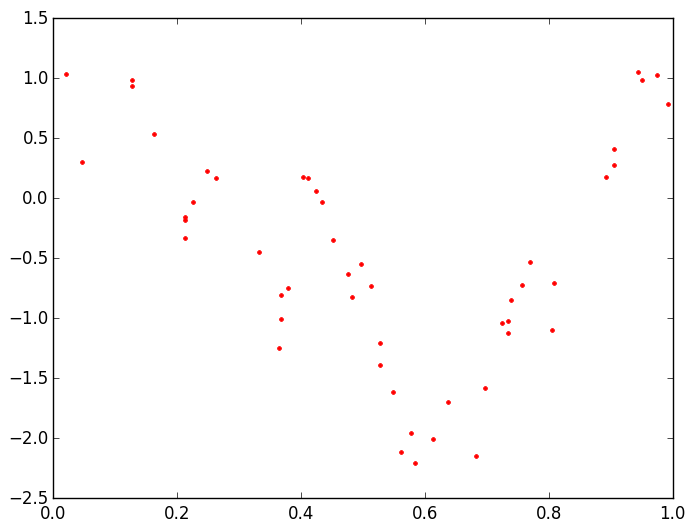

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x322ab9450>

In [3]:
plot(x1d_obs, fx1d_obs, "r.", label="obs with noise")

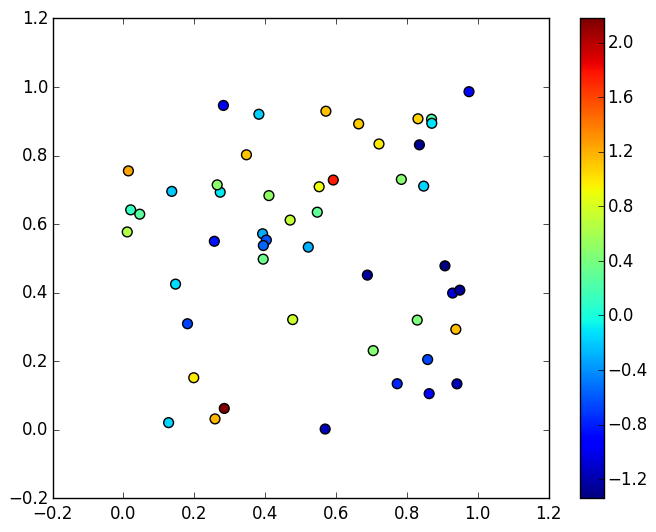

PyObject <matplotlib.colorbar.Colorbar instance at 0x31261b2d8>

/Users/inchani/python/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [4]:
scatter(x2d_obs[:,1], x2d_obs[:,2], c=fx2d_obs, s = 50, vmin = minimum(fx2d_obs), vmax = maximum(fx2d_obs))
colorbar()

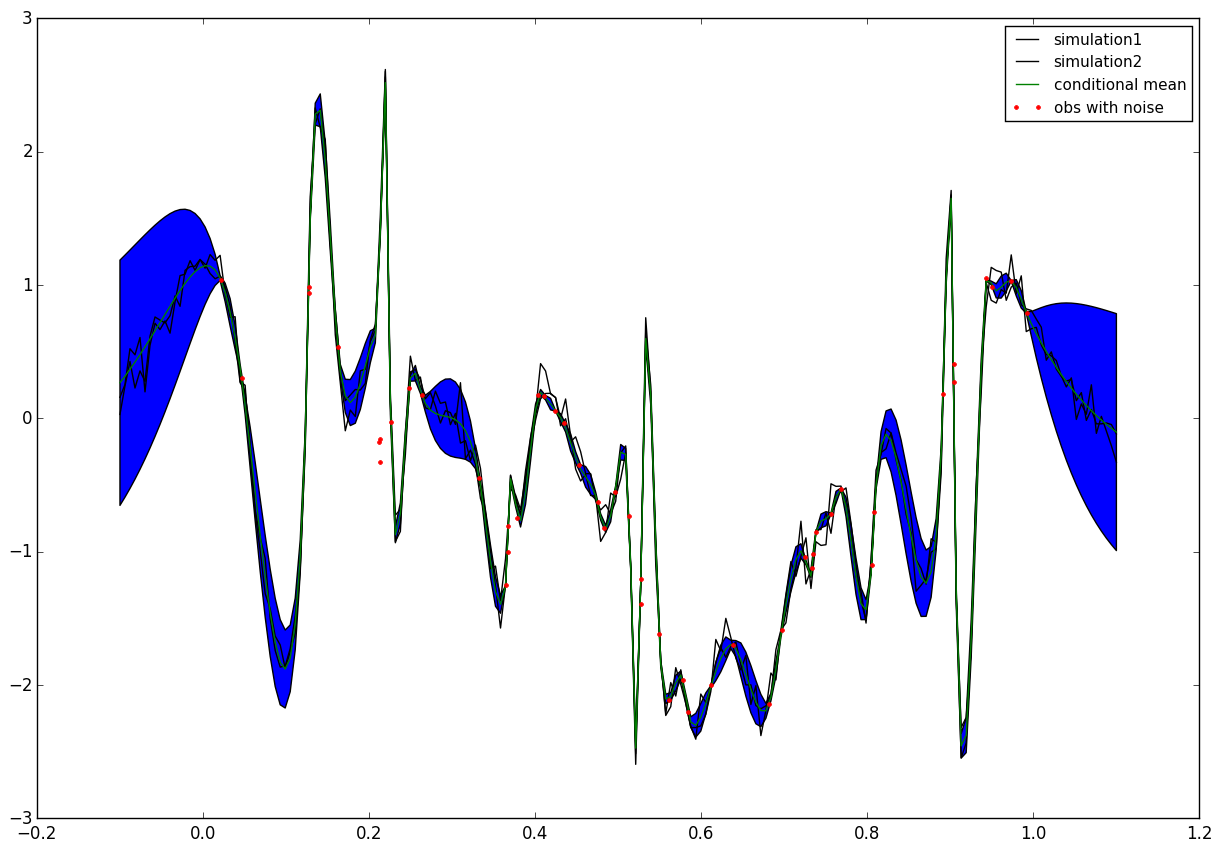

PyObject <matplotlib.legend.Legend object at 0x3235d0290>

In [7]:
cov1(x,y) = exp(-norm(x-y))
cov2(x,y) = (norm(x)^0.85 + norm(y).^0.85 - norm(x-y).^0.85)
function cov3(x,y)
    ν    = 1.2
    ρ    = 0.01
    σ²   = 1.0
    arg  = √(2ν/ρ) * norm(x-y)
    if arg == 0.0
        return σ²
    else
        rtn  = arg^ν
        rtn *= besselk(ν, arg)
        rtn *= σ² * 2^(1-ν) / gamma(ν)
        return rtn
    end
end

dim = 200
x1d_pre    = linspace(-.1, 1.1, dim)
Σcross     = Float64[cov3(xi,yi) for xi in x1d_pre, yi in x1d_obs]
Σobs       = Float64[cov3(xi,yi) for xi in x1d_obs, yi in x1d_obs]
Σpre       = Float64[cov3(xi,yi) for xi in x1d_pre, yi in x1d_pre]

μ = mean(fx1d_obs)

fx_ept = μ + Σcross * inv(Σobs) * (fx1d_obs - μ)
σ2 = Σpre  - Σcross * inv(Σobs) * transpose(Σcross)
σ = √ (σ2 .* eye(dim)) * ones(dim) 

PyPlot.figure(figsize=(15,10))

PyPlot.plot(x1d_pre, fx_ept + 0.1randn(dim), "k-", label="simulation1")
PyPlot.plot(x1d_pre, fx_ept + 0.1randn(dim), "k-", label="simulation2")
PyPlot.plot(x1d_pre, fx_ept, "g-", label="conditional mean")
PyPlot.plot(x1d_obs, fx1d_obs, "r.", label="obs with noise")
PyPlot.fill_between(x1d_pre, fx_ept-σ, fx_ept+σ, label="1σ region")
PyPlot.legend( loc=1,fontsize=11)

In [11]:
μexp =  mean(fxept)
Σ1       = Float64[cov1(xi,yi) for xi in fxept, yi in fxept]
Σ2       = Float64[cov2(xi,yi) for xi in fxept, yi in fxept]
Σ3       = Float64[cov3(xi,yi) for xi in fxept, yi in fxept]
logP1 = -0.5 * transpose(fxept-μexp) * inv(Σ1) * (fxept-μexp)  - log10(2π * √(det(Σ1)))
logP2 = -0.5 * transpose(fxept-μexp) * inv(Σ2) * (fxept-μexp)  - log10(2π * √(det(Σ2)))
logP3 = -0.5 * transpose(fxept-μexp) * inv(Σ3) * (fxept-μexp)  - log10(2π * √(det(Σ3)))
logP1, logP2, logP3

([151.8285473401715],[126.00411172075782],[124.71524050851899])